# Tools

In [1]:
import pandas as pd
%matplotlib inline

# Load Data

In [2]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(data_url)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,862,877,880,880,880,884,884,889,889,897
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,576,607,638,687,705,749,779,812,851,880


# Data preparation

In [3]:
df.shape

(266, 189)

In [4]:
#filter using country name
df = df.loc[df['Country/Region'] == 'United Kingdom']
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20
217,Bermuda,United Kingdom,32.3078,-64.7505,0,0,0,0,0,0,...,150,152,152,153,153,153,153,153,153,153
218,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,203,203,203,203,203,203,203,203,203,203
219,Channel Islands,United Kingdom,49.3723,-2.3644,0,0,0,0,0,0,...,581,583,583,583,583,583,583,583,583,584
220,Gibraltar,United Kingdom,36.1408,-5.3536,0,0,0,0,0,0,...,180,180,180,180,180,180,180,182,184,184
221,Isle of Man,United Kingdom,54.2361,-4.5481,0,0,0,0,0,0,...,336,336,336,336,336,336,336,336,336,336


In [5]:
#remove unused columns
df.drop('Province/State', axis=1, inplace=True)
df.drop('Lat', axis=1, inplace=True)
df.drop('Long', axis=1, inplace=True)
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20
217,United Kingdom,0,0,0,0,0,0,0,0,0,...,150,152,152,153,153,153,153,153,153,153
218,United Kingdom,0,0,0,0,0,0,0,0,0,...,203,203,203,203,203,203,203,203,203,203
219,United Kingdom,0,0,0,0,0,0,0,0,0,...,581,583,583,583,583,583,583,583,583,584
220,United Kingdom,0,0,0,0,0,0,0,0,0,...,180,180,180,180,180,180,180,182,184,184
221,United Kingdom,0,0,0,0,0,0,0,0,0,...,336,336,336,336,336,336,336,336,336,336


In [6]:
#group all rows of same country
df = df.groupby('Country/Region').sum()


In [7]:
#remove zero values
df = df.loc[:, (df != 0).any(axis=0)]

In [8]:
#remove the unused country column
df.reset_index(inplace=True)
df.drop('Country/Region', axis=1, inplace=True)
df.head()

,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,...,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20
0,2,2,2,8,8,9,9,9,13,14,...,293469,294116,294803,295632,296358,296944,297389,297952,298731,299500


In [9]:
# transpose
df = df.transpose()

In [10]:
df

,0
1/31/20,2
2/1/20,2
2/2/20,2
2/3/20,8
2/4/20,8
...,...
7/20/20,296944
7/21/20,297389
7/22/20,297952
7/23/20,298731


In [11]:
#change to datetime
dformat = '%m/%d/%y'
df.index = pd.DatetimeIndex(pd.to_datetime(df.index, format=dformat))
df.head()

,0
2020-01-31,2
2020-02-01,2
2020-02-02,2
2020-02-03,8
2020-02-04,8


In [12]:
#prepare for Prophet
df.reset_index(inplace=True)
df.rename(columns={'index':'ds', 0:'y'},inplace=True)
df.head()

,ds,y
0,2020-01-31,2
1,2020-02-01,2
2,2020-02-02,2
3,2020-02-03,8
4,2020-02-04,8


# Data visualization

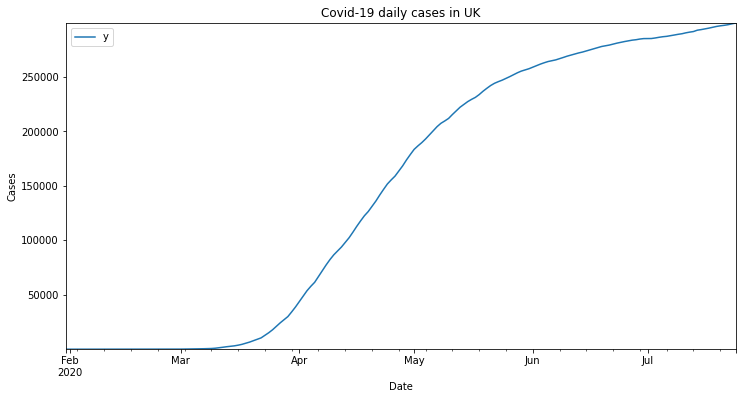

In [13]:
#plot number of cases accross time
ax = df.plot(x='ds', y='y',figsize=(12,6), title='Covid-19 daily cases in UK')
ax.autoscale(axis='both',tight=True)
ax.set(xlabel='Date',ylabel='Cases');

# Model training

In [14]:
from fbprophet import Prophet
#split data into training and test sets
train_to_index = round(len(df) * .925) #7.5 percent data for testing
train_data = df.iloc[:train_to_index]
test_data = df.iloc[train_to_index:]
print('training data length',len(train_data),'test data length',len(test_data))

training data length 163 test data length 13


#### We create an instance of the Prophet model. Since our data plot was showing an exponential trend, i.e., the general tendency of the data to increase during a period, we set the input arguments seasonality_mode=’multiplicative’ and growth =’linear.’ And since our data is on the daily frequency, we set daily_seasonality=True. The tuning parameter changepoint_prior_scale is set it to 0.5. Next, we train our model on the training set. Furthermore, parameter tuning can be adjusted based on the dataset and problem domain.

#### A data frame is generated with future dates for forecasting using ‘make_future_dataframe’ with the frequency set to ‘D’ as our data is daily. The length of these dates is set to the same length as the test set, as we are going to be comparing the results later on for model evaluation. The data frame is then passed to our model to predict the values for these dates.

In [15]:
#create model and train on training set
model = Prophet(growth ='linear',
seasonality_mode='multiplicative',
changepoint_prior_scale=0.5,
weekly_seasonality=False,
daily_seasonality=True)
model.fit(train_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [16]:
#generate a dataframe with future dates, frequency is set to daily
future = model.make_future_dataframe(periods=len(test_data),freq='D')

In [17]:
#predict values for future dates
forecast = model.predict(future)

# Plotting model results

Now that our model is trained, we need to visualize the results. Prophet has a plotting functionality termed plot which draws the original data (black dots), the model (blue line), and the error of the forecast (shaded blue area).

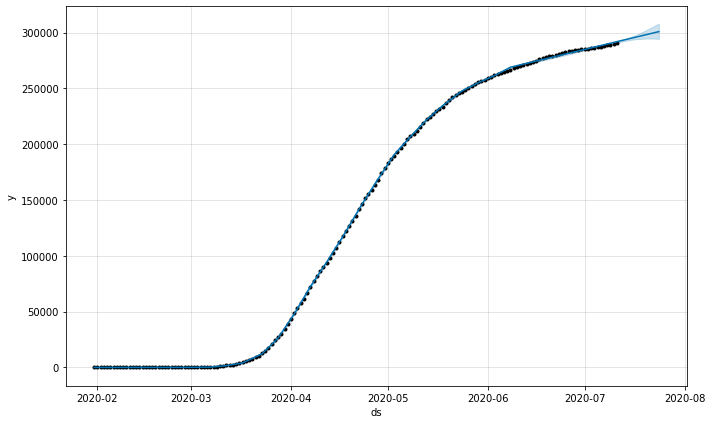

In [18]:
#plot model results
model.plot(forecast);

# Model evaluation


To help us understand the accuracy of our forecasts, we compare the predicted number of cases to the real number of cases for the time series. To do this, we need to build a combined data frame with ‘yhat’ from the forecasts and the original ‘y’ values from the data.


In [19]:
#generate combined dataframe
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
metric_df.tail()

,ds,yhat,y
171,2020-07-20,298122.919443,296944
172,2020-07-21,298816.599309,297389
173,2020-07-22,299510.279174,297952
174,2020-07-23,300203.959039,298731
175,2020-07-24,300897.638905,299500


Now that we have our forecasted values against real values, we use r2_score() from sci-kit-learn to generate our R-Squared. The coefficient of determination (denoted by R2) is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

In [20]:
from sklearn.metrics import r2_score
r2_score(metric_df.y, metric_df.yhat)

0.9999576694878322

The best possible score is 1.0, so the value of 0.99 is very good for our model.

Furthermore, we use mean_squared_error() from scikit-learn for evaluating our results. Mean squared error (MSE) is the summation of squares of all (predicted — actual values) divided by the number of data points. The MSE is a measure of the quality of an estimator. The smaller the MSE, the closer we are to finding the line of best fit. Our MSE value is 607816, which is pretty large and means that there is still room for further improvement using hyperparameter tuning on the model or more data to get better results.

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(metric_df.y, metric_df.yhat)

607816.5656317542

# Forecasting future dates

In the previous sections, we evaluated our model on a forecast of the test data dates that we already have. Now we need to build some future dates to forecast into. To forecast this future data, we generate a data frame with 15 future days, then we run it through Prophet’s model ‘predict’ function, and we display the results.

In [22]:
#generate a dataframe with future dates, frequency is set to daily
future = model.make_future_dataframe(periods=15, freq = 'D')

In [23]:
#predict values for future dates
forecast = model.predict(future)

In [24]:
#print only required columns ds, yhat, yhat_lower, yhat_upper
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
168,2020-07-17,296041.879847,294208.175859,297987.429848
169,2020-07-18,296735.559713,294402.550671,299341.680846
170,2020-07-19,297429.239578,294464.806257,300525.936517
171,2020-07-20,298122.919443,294508.169073,301874.517924
172,2020-07-21,298816.599309,294357.111196,303436.156150
173,2020-07-22,299510.279174,294324.649784,304998.697547
174,2020-07-23,300203.959039,293723.589819,306307.488934
175,2020-07-24,300897.638905,293810.921162,308135.505416
176,2020-07-25,301591.318770,293730.453909,309623.115995
177,2020-07-26,302284.998635,293358.990887,311018.111259


# Conclusion

We have explained how to do time series forecasting with Prophet using data from Coronavirus (Covid19) Johns Hopkins University Center. We went through loading the data, preparing the data for the Prophet model, plotting the data, training the model, plotting model results, model evaluation, and forecasting future dates. We note that it is impossible to come up with a general approach for all forecasting problems, as each problem has its own distinctions and requires special steps. However, this article was meant to give a basic guideline and understanding about time series forecasting that can be further modified according to the problem domain.

# References and further reading

[1] https://github.com/CSSEGISandData/COVID-19

[2] https://facebook.github.io/prophet/docs/quick_start.html

[3] https://nextjournal.com/eric-brown/forecasting-with-prophet

[4] https://nextjournal.com/eric-brown/forecasting-with-prophet-part-4

[5] https://towardsdatascience.com/implementing-facebook-prophet-efficiently-c241305405a3